# **California Housing Price Analysis**

## Background Context
Pasar perumahan California mempunyai market real estate paling dinamis dan beragam di Amerika Serikat. Median price di pasar perumahan di California adalah yang tertinggi di Amerika Serikat, dimana harga median tersebut adalah dua kali lipat dibanding harga median nasional Amerika Serikat (LAO). Market tersebut mencakupi beragam jenis properti, seperti apartemen perkotaan hingga kawasan pedesaan. Selama bertahun-tahun, negara bagian ini menghadapi tantangan perumahan yang signifikan karena faktor-faktor seperti pertumbuhan penduduk, kesenjangan sosial, dan tingginya permintaan perumahan di daerah perkotaan. Hal tersebut menyebabkan variasi harga rumah yang signifikan di berbagai wilayah di California.


## Problem Statement
Pasar jual beli rumah adalah ranah yang sulit. Jika harga rumah tidak sesuai, makan akan mengakibatkan rumah tersebut lama/tidak laku atau merugikan pemilik rumah yang ingin menjual rumah tersebut. Membeli rumah untuk bagian besar orang adalah sebuah komitmen besar, sehingga harus ada pertimbangan-pertimbangan tertentu yang harus dipikirkan sebelum melakukan pembelian. Kumpulan data perumahan California memberikan gambaran pasar ini dengan memberikan wawasan tentang variabel-variabel utama seperti usia perumahan, pendapatan median, populasi, total kamar, dan kedekatan dengan laut. Memahami variabel-variabel ini penting untuk menganalisis **keterjangkauan perumahan, permintaan sewa, dan peluang investasi** di berbagai lokasi.

## Goal
Berdasarkan problem statement, pihak real estate dapat mendapat insight dalam menentukan lokasi `high-value` dan `trend market` untuk menghasilkan harga properti yang cocok dengan menggunakan model machine learning dari hasil analisa dataset ini.

## Analytical Approach
Analisa ini bertujuan untuk mengembangkan `model prediktif` untuk **memperkirakan harga rumah** berdasarkan berbagai faktor sosioekonomi, demografi, dan geografis dari kumpulan data perumahan California. Model ini dapat membantu pengembang `real estate`, `investor`, dan `pemerintah setempat` dalam memahami dinamika harga di berbagai wilayah.

## Evaluation Metrics 
1. RMSE: untuk mengukur standar deviasi residu dari hasil prediksi dengan nilai sebenrarnya
2. MAE: alternatif untuk data dengan banyak outlier di residu
3. RMSLE: pengukuran rmse dalam skala logaritmik karena rentang nilai prediksi nya besar, dalam skala ratusan ribu USD
4. MAPE: mengukur relative error dalam persen
5. R-Square: mengukur kemampuan model dalam menjelaskan hasil prediksi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#splitting
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif

#preprocessing
from sklearn.compose import ColumnTransformer

import category_encoders as ce

#model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression


#tuning model
from sklearn.model_selection import GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

#metric
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, recall_score, f1_score

# Loading Dataset

In [2]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# Data Understanding and Preprocessing

## Data Information and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### Data Understanding List

1. `longitude`
   - **Description**: The geographic coordinate representing the east-west position of a point on the Earth's surface.
   - **Type**: Numerical (Continuous).
   - **Range**: Typically between -180 to 180 degrees.
   - **Use Case**: Helps in locating properties geographically. Can be used to analyze location-based trends or proximity to landmarks like the ocean.

2. `latitude`
   - **Description**: The geographic coordinate specifying the north-south position of a point on the Earth's surface.
   - **Type**: Numerical (Continuous).
   - **Range**: Typically between -90 to 90 degrees.
   - **Use Case**: Useful alongside `longitude` to assess the geographic location of properties.

3. `housing_median_age`
   - **Description**: The median age of the houses in the region or block.
   - **Type**: Numerical (Discrete).
   - **Range**: Positive integer representing the age in years.
   - **Use Case**: Used to gauge the age of the housing stock, which can influence pricing trends or indicate demand for renovations.

4. `total_rooms`
   - **Description**: The total number of rooms in all houses within the block or region.
   - **Type**: Numerical (Discrete).
   - **Use Case**: Helps in understanding the housing density or size. Dividing by `households` gives the average number of rooms per household, a metric for living standards.

5. `total_bedrooms`
   - **Description**: The total number of bedrooms in all houses in the block or region.
   - **Type**: Numerical (Discrete).
   - **Use Case**: Useful for determining average bedrooms per household, indicating housing affordability or overcrowding.

6. `population`
   - **Description**: The total number of people residing in the block or region.
   - **Type**: Numerical (Discrete).
   - **Use Case**: Provides insight into population density and demand in the area. Higher population densities may correlate with higher housing prices.

7. `households`
   - **Description**: The number of households in the block or region.
   - **Type**: Numerical (Discrete).
   - **Use Case**: Helps calculate population per household or rooms per household, offering insights into housing quality or living conditions.

8. `median_income`
   - **Description**: The median income of households in the block or region.
   - **Type**: Numerical (Continuous).
   - **Range**: Positive real number representing income in thousands of dollars.
   - **Use Case**: An important socioeconomic feature, often strongly correlated with house prices. Areas with higher median incomes typically have higher housing values.

9. `ocean_proximity`
   - **Description**: A categorical variable indicating the proximity of the region to the ocean (e.g., "near ocean", "inland").
   - **Type**: Categorical.
   - **Use Case**: Key in determining how location relative to the ocean affects property value. Properties closer to the ocean tend to have higher demand and prices.

10. `median_house_value`
   - **Description**: The median house value in the block or region (often the target variable for prediction models).
   - **Type**: Numerical (Continuous).
   - **Use Case**: Target variable for regression models. Understanding its relationships with other features helps predict market trends.


In [5]:
df.shape 

(14448, 10)

Terdapat `14448 baris` dan `10 kolom` di dataset ini

### Missing Value

<Axes: >

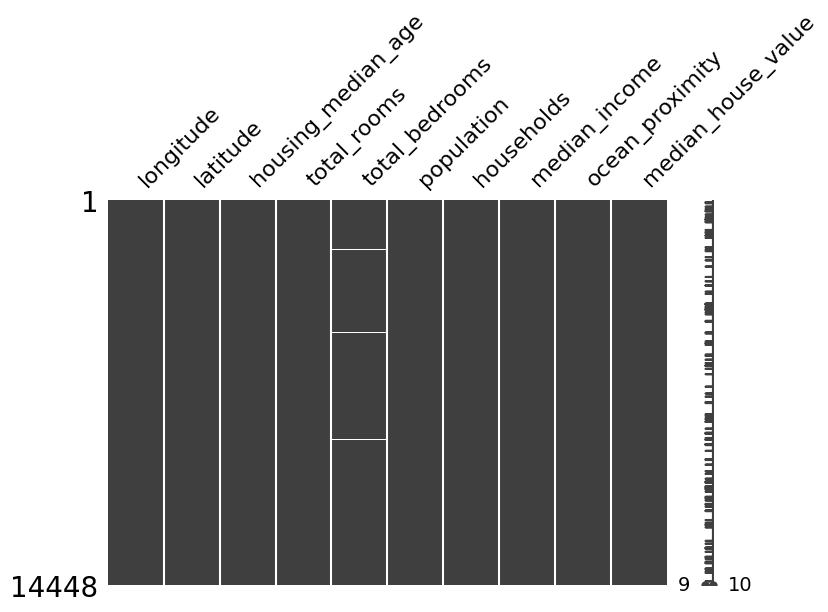

In [6]:
import missingno as msno

msno.matrix(df,figsize=(8,5))


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat `137` missing value pada kolom `total_bedrooms`

In [8]:
percentage_missing_bedrooms = round(100*(df['total_bedrooms'].isna().sum() / df.shape [0]),2)
print(f"Missing value mencakupi {percentage_missing_bedrooms}% dari data keseluruhan")

Missing value mencakupi 0.95% dari data keseluruhan


Dikarenakan presentase tersebut sangat kecil, maka memungkinkan untuk me-`drop` baris-baris tersebut


In [9]:
df.dropna(subset=['total_bedrooms'], inplace=True)
display(df.isna().sum(),df.shape[0])

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

14311

Data sudah di drop dan terlihat tidak ada lagi missing value

In [10]:
for i in df.columns:
    display(df[i].value_counts().reset_index())

,longitude,count
0,-118.31,115
1,-118.28,107
2,-118.30,106
3,-118.29,104
4,-118.32,98
...,...,...
801,-124.26,1
802,-116.19,1
803,-119.43,1
804,-123.03,1


,latitude,count
0,34.06,169
1,34.05,162
2,34.08,161
3,34.04,159
4,34.07,154
...,...,...
830,41.38,1
831,35.85,1
832,34.84,1
833,39.60,1


,housing_median_age,count
0,52.0,891
1,36.0,580
2,35.0,568
3,16.0,518
4,17.0,501
5,34.0,491
6,33.0,428
7,26.0,424
8,18.0,394
9,25.0,393


,total_rooms,count
0,1582.0,14
1,1613.0,13
2,1722.0,13
3,1705.0,12
4,1465.0,12
...,...,...
5208,6597.0,1
5209,4114.0,1
5210,4630.0,1
5211,10211.0,1


,total_bedrooms,count
0,331.0,39
1,348.0,38
2,289.0,38
3,309.0,36
4,426.0,36
...,...,...
1743,3638.0,1
1744,4585.0,1
1745,1334.0,1
1746,2205.0,1


,population,count
0,1227.0,22
1,1203.0,19
2,837.0,19
3,891.0,19
4,781.0,18
...,...,...
3486,4486.0,1
3487,10493.0,1
3488,2168.0,1
3489,2534.0,1


,households,count
0,335.0,44
1,380.0,39
2,239.0,39
3,316.0,39
4,386.0,39
...,...,...
1641,1526.0,1
1642,1359.0,1
1643,2683.0,1
1644,1385.0,1


,median_income,count
0,2.8750,39
1,4.1250,35
2,3.1250,35
3,2.6250,32
4,15.0001,30
...,...,...
9721,6.7079,1
9722,5.3276,1
9723,7.1088,1
9724,5.2363,1


,ocean_proximity,count
0,<1H OCEAN,6300
1,INLAND,4544
2,NEAR OCEAN,1855
3,NEAR BAY,1610
4,ISLAND,2


,median_house_value,count
0,500001.0,672
1,137500.0,82
2,162500.0,78
3,225000.0,69
4,187500.0,69
...,...,...
3535,393900.0,1
3536,437500.0,1
3537,324300.0,1
3538,352500.0,1


Bisa dilihat pada kolom kategorik `ocean_proximity` hanya total 2 baris yang mempunyai value 'ISLAND'. Data tersebut tidak cukup untuk membuat model regresi, maka dari itu data tersebut akan di drop

In [11]:
# Menghapus data dengan 'ocean_proximity' == 'ISLAND'
df = df[df['ocean_proximity'] != 'ISLAND']
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
Name: count, dtype: int64

### Duplicated Data

In [12]:
sum_duplicated=df.duplicated().sum()
print(f'Jumlah data yang terduplikat adalah: {sum_duplicated}')

Jumlah data yang terduplikat adalah: 0


Code block diatas menunjukan bahwa tidak ada kolom terduplikat di dalam dataset ini setelah melakukan handling missing value

### Unique values

In [13]:
empty_list = []


for col in df.columns:
    unique_values = df[col].nunique()
    sample_unique_values = list(df[col].drop_duplicates().sample(2).values)
    empty_list.append([col, unique_values, sample_unique_values])

# Step 6: Create a DataFrame to store and display the collected information
df_model_desc = pd.DataFrame(columns=['Column', 'Unique_var', 'uniqueSample'], 
                             data=empty_list)

# Step 7: Display the final DataFrame
df_model_desc


,Column,Unique_var,uniqueSample
0,longitude,806,"[-120.33, -119.88]"
1,latitude,835,"[40.19, 39.42]"
2,housing_median_age,52,"[44.0, 45.0]"
3,total_rooms,5212,"[9071.0, 380.0]"
4,total_bedrooms,1748,"[1597.0, 2219.0]"
5,population,3491,"[2189.0, 1853.0]"
6,households,1646,"[2051.0, 522.0]"
7,median_income,9726,"[3.8488, 3.9613]"
8,ocean_proximity,4,"[NEAR BAY, <1H OCEAN]"
9,median_house_value,3540,"[227900.0, 192100.0]"


Setelah proses filter, total baris adalah 13560 dari sebelumnya yaitu 14111 baris.

Selain itu, dari proses eksplorasi dataset juga telah diketahui bahwa data dengan kategori 'ISLAND' pada kolom ocean_proximity hanya berjumlah 2. Sementara jumlah ini terlalu sedikit untuk proses training, validation, dan testing sehingga 2 baris data tersebut perlu dikeluarkan dari proses dataset.

## Exploratory Data Analysis

#### Distribution of Median House Value

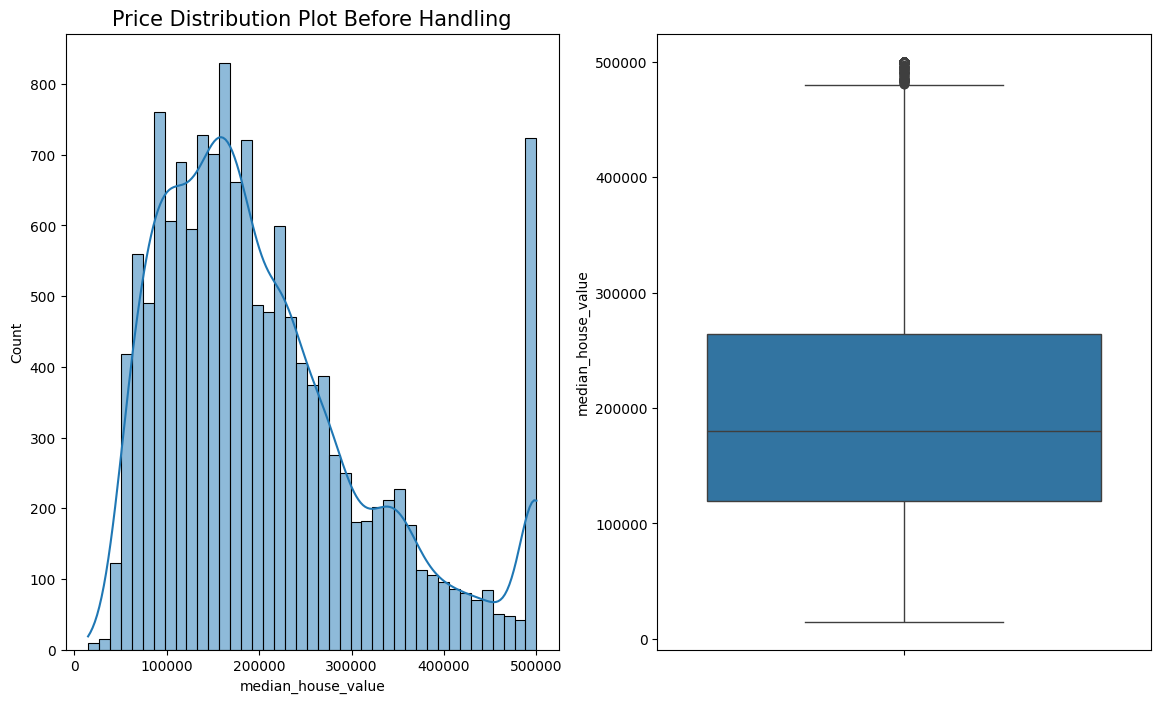

In [14]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'],kde=True)
plt.ylabel('Count')
plt.title('Price Distribution Plot Before Handling', size=15)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['median_house_value'])
plt.show()

Berdasarkan plot distribusi, harga menunjukan distribusi skew positif. Ini menunjukkan bahwa price **tidak terdistribusi normal**.

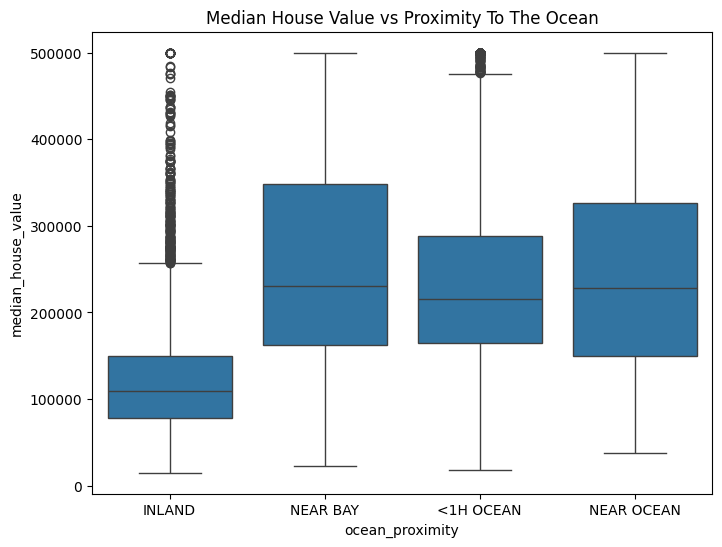

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value')
plt.title('Median House Value vs Proximity To The Ocean')
plt.show()

Segmentasi berdasarkan ocean_proximity menunjukkan banyaknya outlier pada proximity inland dan juga 1h>ocean yang menyebabkan skew pada distribusi median_house_value 

### Outlier handling

Proses ini untuk menghandle outlier yang membuat distribusi skew pada median_house_value.

In [16]:
#Menggunakan upper_bound untuk memfilter data outlier
Q1 = np.percentile(df['median_house_value'], 25)
Q3 = np.percentile(df['median_house_value'], 75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
upper_bound

np.float64(480150.0)

In [17]:
df = df[df['median_house_value'] < upper_bound]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14441,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,2.2375,NEAR OCEAN,102900.0
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0


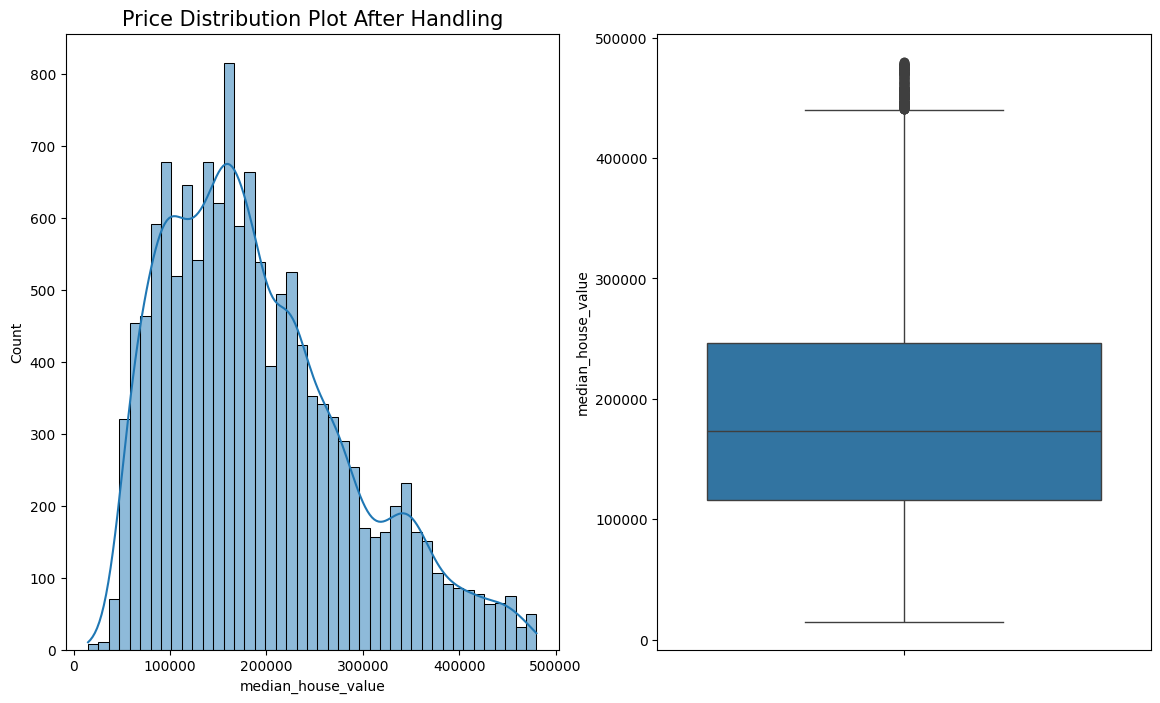

In [18]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'],kde=True)
plt.ylabel('Count')
plt.title('Price Distribution Plot After Handling', size=15)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['median_house_value'])
plt.show()

Setelah outlier handling, plot diatas menunjukkan bahwa data outlier sudah tidak ada. Namun median_house_value masih terdistribusi tidak normal atau 'skew positif'

In [19]:
numeric_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')
display(numeric_data.info(),categorical_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13558 entries, 0 to 14447
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13558 non-null  float64
 1   latitude            13558 non-null  float64
 2   housing_median_age  13558 non-null  float64
 3   total_rooms         13558 non-null  float64
 4   total_bedrooms      13558 non-null  float64
 5   population          13558 non-null  float64
 6   households          13558 non-null  float64
 7   median_income       13558 non-null  float64
 8   median_house_value  13558 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 13558 entries, 0 to 14447
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  13558 non-null  object
dtypes: object(1)
memory usage: 211.8+ KB


None

None

Dari 10 kolom, hanya ada satu kolom yang bukan data type numeric. Melainkan data tersebut tergolong object/kategoric, yaitu `ocean_proximity`

In [20]:
print(f"Jumlah properti vs ocean_proximity:\n{df['ocean_proximity'].value_counts()}")


Jumlah properti vs ocean_proximity:
ocean_proximity
<1H OCEAN     5891
INLAND        4526
NEAR OCEAN    1689
NEAR BAY      1452
Name: count, dtype: int64


Majoritas properti berlokasi 1 jam dari lautan, diikuti dengan `inland` atau lebih ke tengah, dan `near ocean` atau dekat dengan lautan

In [21]:
df.groupby(['ocean_proximity'])['median_house_value'].median().reset_index()

,ocean_proximity,median_house_value
0,<1H OCEAN,207100.0
1,INLAND,108450.0
2,NEAR BAY,215300.0
3,NEAR OCEAN,215600.0


`Insight`: Berdasarkan tabel diatas, semakin dekat ke laut semakin tinggi median_house_value 

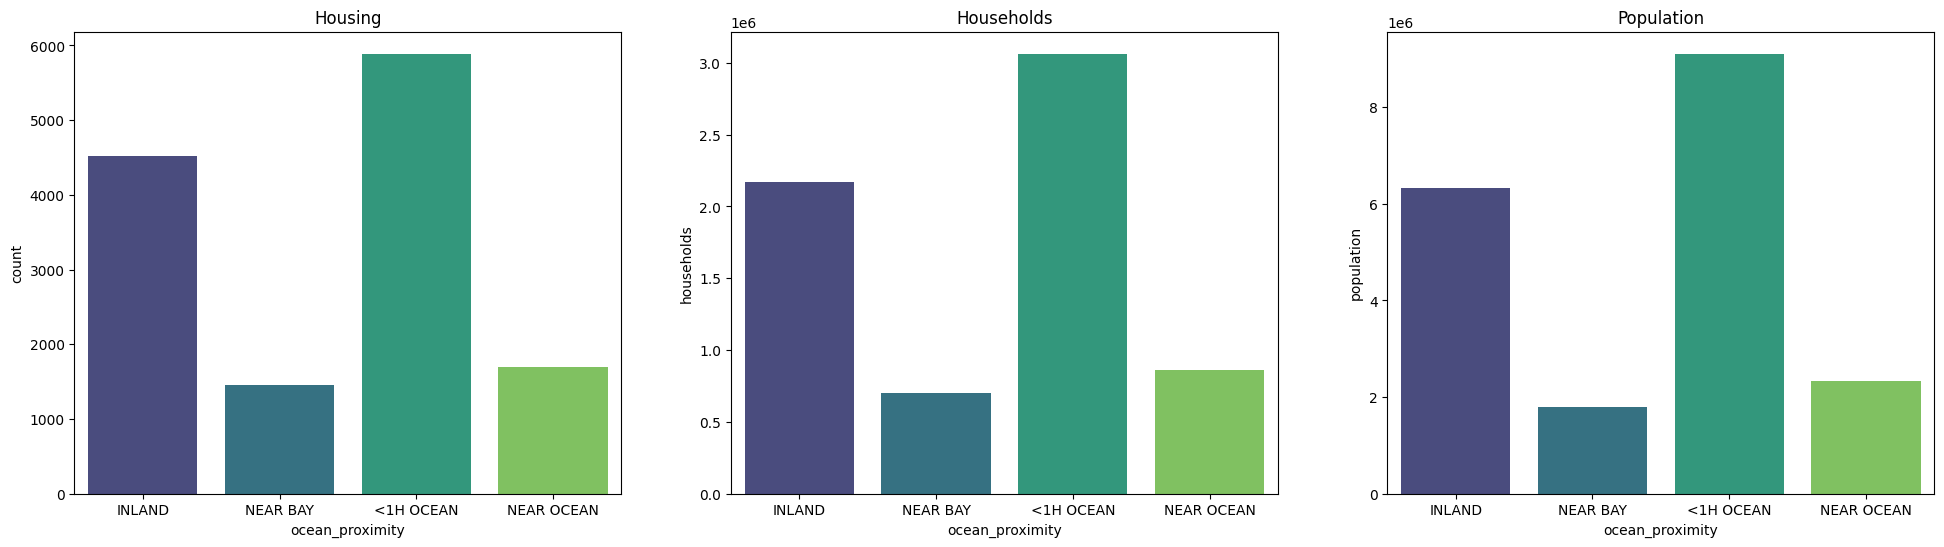

In [22]:
plt.figure(figsize=(24,6))

#Housing
plt.subplot(1,3,1)
sns.countplot(data=df, x='ocean_proximity', palette='viridis')
plt.title('Housing')

#Households
plt.subplot(1,3,2)
data = df.groupby('ocean_proximity')['households'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='households', palette='viridis', order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN'])
plt.title('Households')

#Population
plt.subplot(1,3,3)
data = df.groupby('ocean_proximity')['population'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='population', palette='viridis', order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN'])
plt.title('Population')

plt.show()

Dapat disimpulkan dari visualisasi diatas, terlihat korelasi linear antara housing, households dan population dari bentuk barplot

### Normality Test for Numerical Columns
Untuk mencari tahu apakah data numeric terdistribusi normal apa tidak

In [23]:
from scipy.stats import normaltest

#apply normaltest
normality_results=df.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index().rename(columns={'index':'features',0:'p_value'})

normality_results

,features,p_value
0,longitude,0.000000e+00
1,latitude,0.000000e+00
2,housing_median_age,1.970106e-246
3,total_rooms,0.000000e+00
4,total_bedrooms,0.000000e+00
5,population,0.000000e+00
6,households,0.000000e+00
7,median_income,0.000000e+00
8,median_house_value,1.639888e-225


In [24]:
#cek kolom yang tidak terdistribusi normal
normality_results[normality_results['p_value']<=0.05]['features'].unique()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

Dari test normalitas, bisa disimpulkan bahwa **tidak ada data numerik yang terdistribusi normal** karena semua p_value < 0.05

#### Multicolinearity

In [25]:
# Display kolom yang mempunyai korelasi besar (>=0.5)
dfcorr=df.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][np.abs(corrMatrix[col]) >= 0.5 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)
print(result)

[['longitude', 'latitude', 'longitude'], ['housing_median_age', 'housing_median_age'], ['total_rooms', 'total_bedrooms', 'population', 'households', 'total_rooms'], ['median_income', 'median_house_value', 'median_income']]


ocean_proximity_INLAND       -0.556867
ocean_proximity_NEAR BAY      0.148056
ocean_proximity_NEAR OCEAN    0.133387
Name: median_house_value, dtype: float64


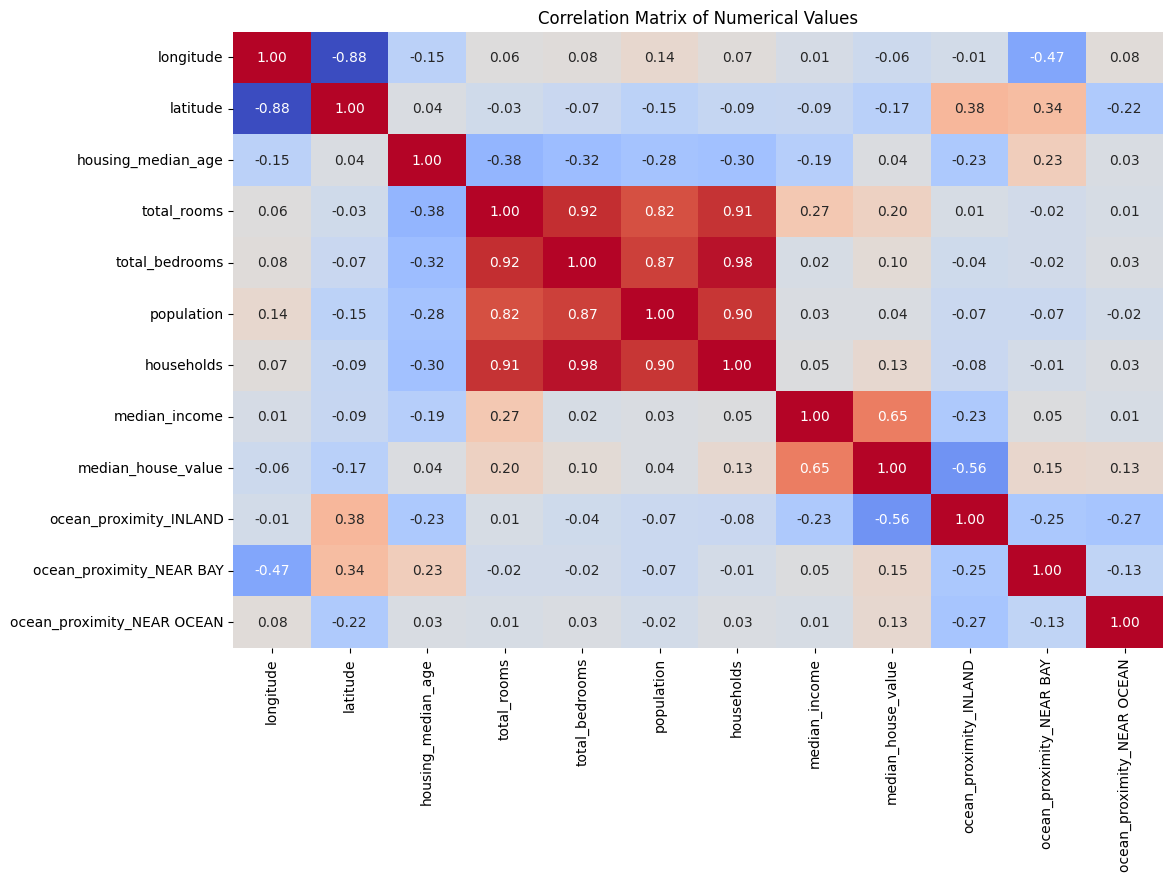

In [26]:
# For multicol test, categorical data is encoded
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Calculate correlations between the encoded 'ocean_proximity' columns and median_house_value
correlations = df_encoded.corr(method='spearman')

# Select only correlations with median_house_value
correlation_with_house_value = correlations['median_house_value']

# Display correlations of ocean_proximity categories with house value
print(correlation_with_house_value.filter(like='ocean_proximity'))

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap='coolwarm', annot=True, fmt='.2f',cbar=False)
plt.title('Correlation Matrix of Numerical Values')
plt.show()


`Insights`:
- Ocean Proximity (INLAND): `Korelasi negatif dengan nilai_rumah_median (-0,56) dan pendapatan_median (-0,26)`. Daerah pedalaman cenderung memiliki nilai rumah dan pendapatan yang lebih rendah dibandingkan dengan daerah pesisir.
- Ocean Proximity (NEAR BAY): `Korelasi positif sedang dengan pendapatan_median (0,35) dan korelasi negatif yang lebih lemah dengan nilai_rumah_median (-0,14)`, yang menunjukkan bahwa daerah dekat teluk memiliki pendapatan yang sedikit lebih tinggi tetapi belum tentu nilai rumah yang lebih tinggi.
- Ocean Proximity (NEAR OCEAN): `Korelasi positif dengan garis lintang (0,22) dan garis bujur (-0,08)`, yang menunjukkan bahwa daerah dekat laut lebih mungkin berada di lokasi geografis tertentu.
- Ada korelasi signifikan terhadap `median_income` vs `median_house_value`. Selain itu, ada juga korelasi terhadap `total_rooms` vs `median_house_value`. Tapi korelasi tersebut tidak terlalu signifikan.

## Location (Longitude & Latitude)

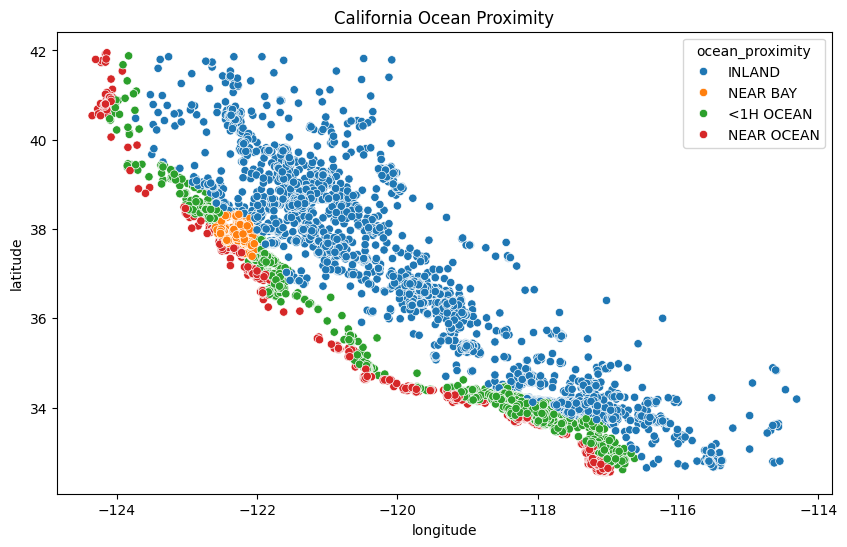

In [27]:
# Plot lokasi 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=df['ocean_proximity']).set_title('California Ocean Proximity')
plt.show()

# # Plot persebaran 'room_type'
# plt.figure(figsize=(10, 6))
# sns.scatterplot(df['longitude'], df['latitude'], hue=df['room_type']).set_title('Room Type Location per Neighbourhood Group');

In [28]:
distance_ocean = pd.DataFrame(df['ocean_proximity'].value_counts().reset_index())
distance_ocean

,ocean_proximity,count
0,<1H OCEAN,5891
1,INLAND,4526
2,NEAR OCEAN,1689
3,NEAR BAY,1452


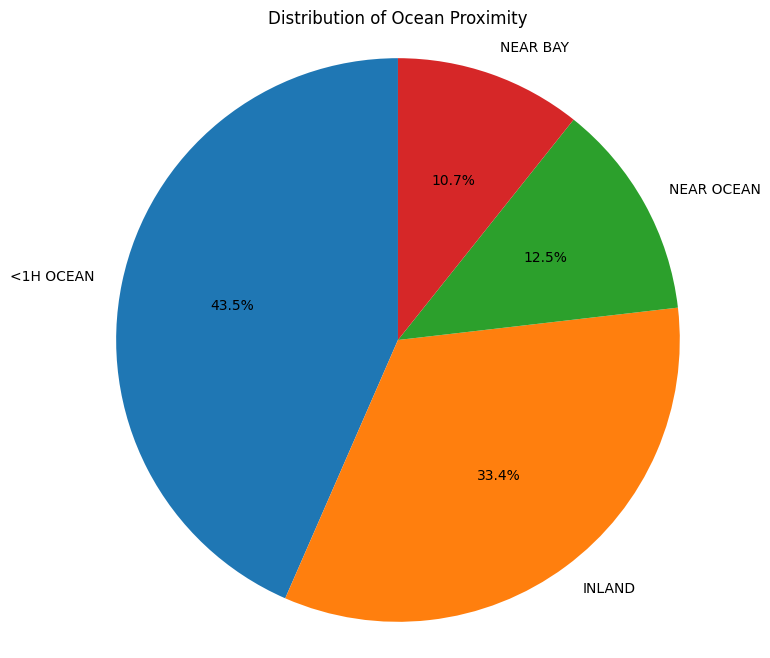

In [29]:
import matplotlib.pyplot as plt

# Data
labels = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
sizes = [6369, 4576, 1879, 1622, 2]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(distance_ocean['count'], labels=distance_ocean['ocean_proximity'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ocean Proximity')
plt.show()


# Modelling

### Feauture Engineering

Dengan asumsi bahwa 1 rumah tangga menempati 1 rumah, maka diperlukan kolom rata-rata banyak kamar tidur per rumah dan rata-rata banyak ruangan per rumah yang diperoleh dengan membagi `total_bedrooms` dan `total_rooms` dengan households.

In [30]:
#Membuat 2 kolom baru
df['avg_rooms_num'] = round(df['total_rooms']/df['households'])
df['avg_bedrooms_num'] = round(df['total_bedrooms']/df['households'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms_num,avg_bedrooms_num
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,3.0,1.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14441,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,2.2375,NEAR OCEAN,102900.0,4.0,1.0
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,5.0,1.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.0,1.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.0,1.0


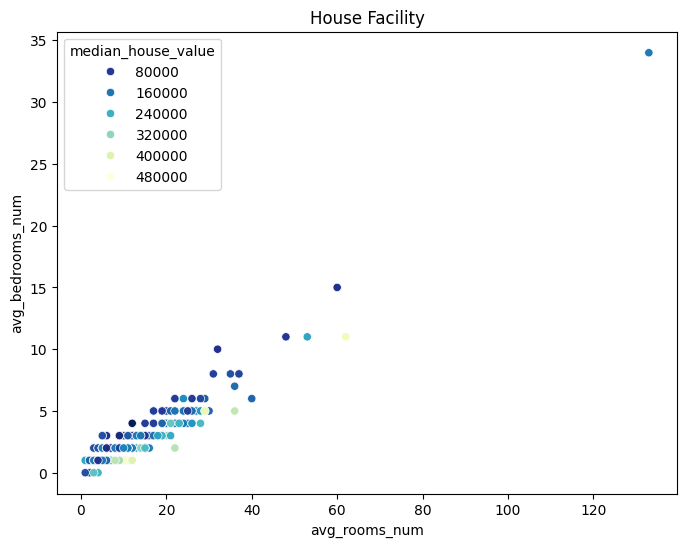

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='avg_rooms_num',y='avg_bedrooms_num',hue='median_house_value',palette='YlGnBu_r')
plt.title('House Facility')
plt.show()

In [32]:
data.reset_index(drop=True,inplace=True)
data.describe()

,population
count,4.000000e+00
mean,4.887310e+06
std,3.461637e+06
min,1.790178e+06
25%,2.199192e+06
50%,4.326343e+06
75%,7.014461e+06
max,9.106376e+06


### Dataset Splitting

In [33]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Di bagian ini, semua fitur akan digunakan di pipeline untuk modelling tahap awal. Setelah modelling, kita akan tahu model yang paling cocok untuk digunakan sebagai prediksi median house value dan juga fitur-fitur mana yang paling signifikan 

## Selecting model base without tuning

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10,objective ='reg:squarederror')

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
xgb = XGBRegressor(random_state=10,objective ='reg:squarederror')

models = [lr,knn,dt,rf,xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

transformer = ColumnTransformer([
    ('encoder_onehot', OneHotEncoder(handle_unknown = 'ignore'), ['ocean_proximity']),
], remainder='passthrough')


scaler = RobustScaler()
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=10)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    #R-Squared
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )
    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )


    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

#### Model Selection

In [37]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'R-Squared': nilai_mean_r2

})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,R-Squared
0,Linear Regression,-59479.384132,1688.051938,-43945.362033,782.843973,-0.271004,0.005668,0.610214
1,KNN Regressor,-56870.786304,1233.530786,-40303.402287,712.450592,-0.236464,0.002076,0.643623
2,DecisionTree Regressor,-65625.397806,1338.040660,-44032.326147,935.166589,-0.258826,0.011886,0.525851
3,RandomForest Regressor,-46046.793999,1194.393099,-31478.119266,494.216752,-0.188173,0.004113,0.766362
4,XGBoost Regressor,-44236.869035,1057.573592,-30033.517587,631.787070,-0.179375,0.003766,0.784379


Dari hasil berikut, bisa disimpulkan bahwa **XGBoost Regressor** mempunyai performa terbaik dibanding model-model yang lain
- RMSE = 44,237 => rata-rata nilai error antara skor prediksi dengan skor sebenarnya adalah 44,237 USD.
- MAE = 30,033 => rata-rata absolut error skor prediksinya adalah 30,033 USD.
- MAPE = 0.179 => rata-rata eror skor prediksi dari skor sebenarnya dalam persentase adalah 0.179%.
- R-Squared = 0.78 => Nilai R^2 bisa merepresentasikan 78% data train

## Tuning Model

### Untuned Model

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
import numpy as np

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'avg_rooms_num', 'avg_bedrooms_num']),
        
        ('Categorical', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ['ocean_proximity'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', XGBRegressor())
])

pipeline.fit(X_train,y_train)
y_pred_untuned = pipeline.predict(X_test)




**RMSE test for train model untuned**

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation with 5 folds
cv_results = cross_val_score(pipeline, X_train, y_train, 
                             cv=5, scoring=mse_scorer, n_jobs=-1)

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_results)

# Print the RMSE for each fold and the average RMSE
print(f"Cross-validation RMSE for each fold: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")

Cross-validation RMSE for each fold: [58185.205742   54259.58890053 54541.63202123 53937.5361236
 55463.59982758]
Average RMSE: 55277.51


### Tuned Model

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
import numpy as np

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'avg_rooms_num', 'avg_bedrooms_num']),
        
        ('Categorical', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ['ocean_proximity'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', XGBRegressor())
])

# Define the parameter grid
param_dist = {
    'feature_selection__k': [14,16,18,20],  
    'regressor__n_estimators': [50, 100, 200],  
    'regressor__max_depth': [3, 6, 10],  
    'regressor__learning_rate': [0.01, 0.1, 0.2],  
    'regressor__subsample': [0.6, 0.8, 1.0], 
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],  
    'regressor__gamma': [0, 0.1, 0.3],  
    'regressor__alpha': [0, 0.1, 1],
    'regressor__lambda': [1, 1.5, 2],  
}

# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform RandomizedSearchCV for XGBoost hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   n_iter=100, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__lambda': 2, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 0.1, 'feature_selection__k': 16}


Dari hasil hyperparameter tuning, kita mendapatkan paramater paling optimal yaitu:

- `'feature_selection__k'`: 16
- `'regressor__alpha'`: 0.1
- `'regressor__colsample_bytree'`: 0.8
- `'regressor__gamma'`: 0
- `'regressor__lambda'`: 2
- `'regressor__learning_rate'`: 0.1
- `'regressor__max_depth'`: 10
- `'regressor__n_estimators'`: 200
- `'regressor__subsample'`: 1.0

#### Prediction using tuned model

In [39]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'avg_rooms_num',
                                                   'avg_bedrooms_num']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handl...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=2,
                              learning_rate=0.1, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=10,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                              n_jobs=None, ...))])

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
model = {'XGBoost': XGBRegressor()}
# Predict using the best model
xgb_tuned = random_search.best_estimator_
xgb_tuned.fit(X_train,y_train)

y_pred = xgb_tuned.predict(X_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred)
r2_xgb_tuned = r2_score(y_test, y_pred)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred)

xgb_tuned_score = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'R-Squared': r2_xgb_tuned }, index=model.keys())
display(xgb_tuned_score)

,RMSE,MAE,MAPE,R-Squared
XGBoost,40862.521377,27747.174581,0.163919,0.812597


Dapat terlihat nilai nilai-nilai metric mengalami perubahan:
- **RMSE** = 44,237 => 40,862 (-3,375)
- **MAE** = 30,033 => 27,747 (-2,286)
- **MAPE** = 0.179 => 0.163 (-0.016)
- **R-Squared** = 0.784 => 0.813 (+0.029)



#### Actual VS Prediction Plot

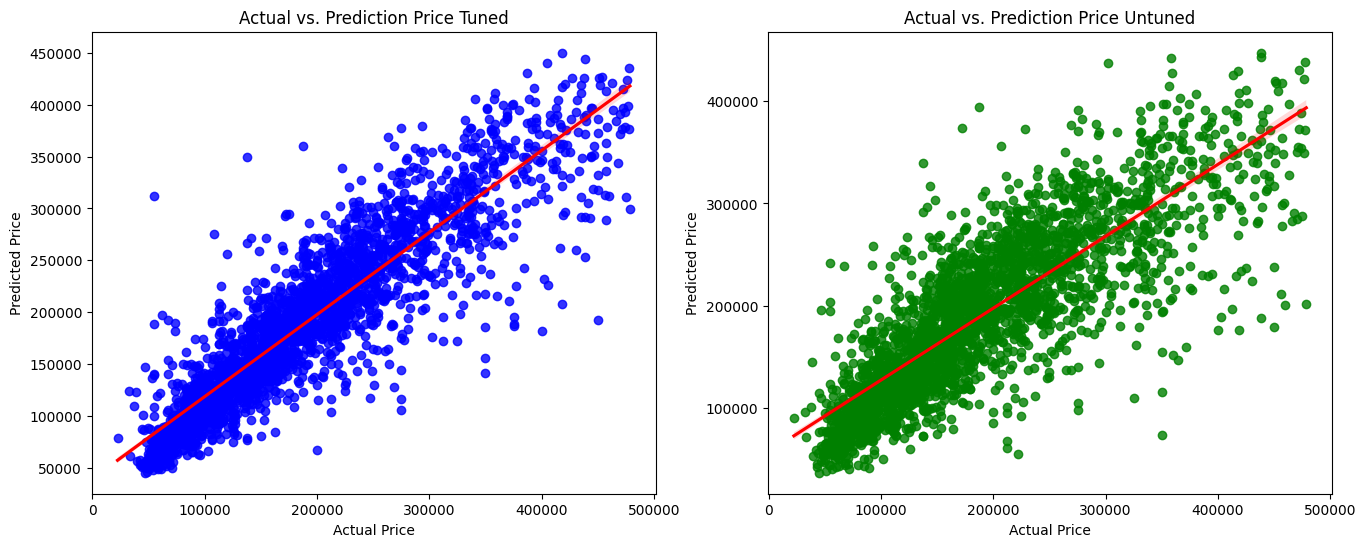

In [50]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Actual vs. Prediction Price Tuned')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_untuned,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Actual vs. Prediction Price Untuned')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

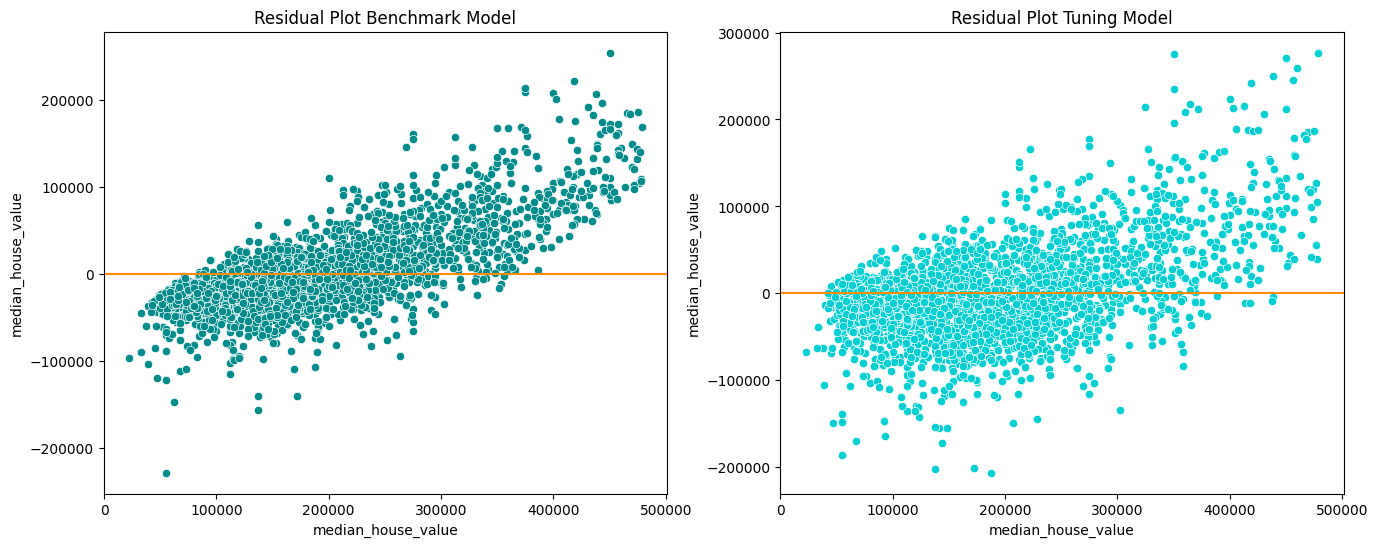

In [119]:
residual_bench = y_test-y_pred
residual_tuned = y_test-y_pred_untuned

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_bench,color='darkcyan')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Benchmark Model')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned,color='darkturquoise')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning Model')
plt.show()

### Feature Importance

Fitur importance merupakan salah satu cara untuk mengevaluasi signifikansi fitur dalam memprediksi nilai median_house_value oleh model yang terpilih.

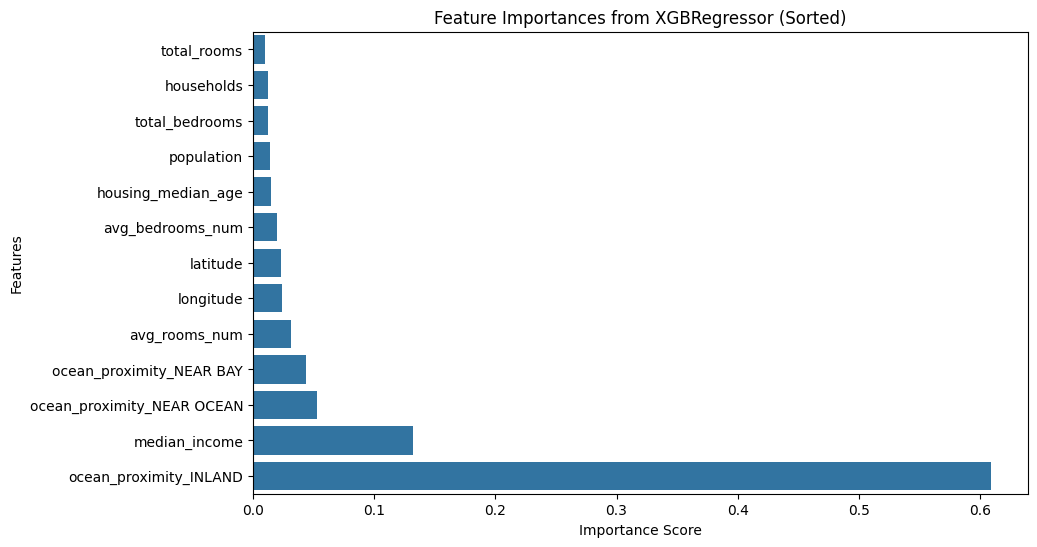

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Access the best estimator (pipeline)
best_pipeline = random_search.best_estimator_

# Extract the trained XGBRegressor from the pipeline
best_regressor = best_pipeline.named_steps['regressor']

# Get the feature importances from the best XGBRegressor
feature_importances = best_regressor.feature_importances_

# Get the feature names after preprocessing and selection
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                      'total_bedrooms', 'population', 'households', 'median_income', 
                      'avg_rooms_num', 'avg_bedrooms_num']
categorical_features = best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(['ocean_proximity'])

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, categorical_features])

# Only select top k features
selected_features = all_feature_names[best_pipeline.named_steps['feature_selection'].get_support()]

# Sort feature importances and corresponding feature names in ascending order
sorted_idx = np.argsort(feature_importances)
sorted_importances = feature_importances[sorted_idx]
sorted_features = selected_features[sorted_idx]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title('Feature Importances from XGBRegressor (Sorted)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


`Insights:`
- Bisa terlihat bahwa ocean_proximity mempunya feature importance yang paling signifikan dikarekanan ocean_proximity_INLAND mempunyai importance score yang paling tinggi
- Median income mempunyai feature importance yang kedua paling tinggi
- avg_rooms_num, longitude dan latitude adalah fitur yang ketiga terakhir yang mempunyai score yang signifikan terhadap median_house_price

## Modelling with Feature Selection

Modelling menggunakan 7 fitur yang mempunyai importance tinggi berdasarkan plot diatas

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
import numpy as np

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'median_income', 'avg_rooms_num', 'avg_bedrooms_num']),
        
        ('Categorical', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ['ocean_proximity'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', XGBRegressor())
])

# Define the parameter grid
param_dist = {
    'feature_selection__k': [16],  
    'regressor__n_estimators': [200],  
    'regressor__max_depth': [10],  
    'regressor__learning_rate': [0.1],  
    'regressor__subsample': [1.0], 
    'regressor__colsample_bytree': [0.8],  
    'regressor__gamma': [0],  
    'regressor__alpha': [0.1],
    'regressor__lambda': [2],  
}

# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform RandomizedSearchCV for XGBoost hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   n_iter=100, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__lambda': 2, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 0.1, 'feature_selection__k': 16}


Fitting ke data train dan prediksi target variable

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
model = {'XGBoost': XGBRegressor()}
# Predict using the best model
xgb_feature = random_search.best_estimator_
xgb_feature.fit(X_train,y_train)

y_pred = xgb_feature.predict(X_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred)
r2_xgb_tuned = r2_score(y_test, y_pred)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred)

xgb_tuned_score = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'R-Squared': r2_xgb_tuned }, index=model.keys())
display(xgb_tuned_score)

,RMSE,MAE,MAPE,R-Squared
XGBoost,40927.282898,27891.048338,0.163555,0.812002


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
model = {'XGBoost': XGBRegressor()}
# Predict using the best model
xgb_feature.fit(X,y) #Fit to larger dataset X,y for model to learn
y_pred_final = xgb_feature.predict(X_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_final)
r2_xgb_tuned = r2_score(y_test, y_pred_final)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_final)

xgb_tuned_score = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'R-Squared': r2_xgb_tuned }, index=model.keys())
display(xgb_tuned_score)

,RMSE,MAE,MAPE,R-Squared
XGBoost,14236.138384,9707.723984,0.059291,0.977254


Menggunakan model dengan best tuning parameter, model mengalami **overfitting**. Maka dari itu, model akan di tuning lebih lanjut

## Tuning Model part 2

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
import numpy as np

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'median_income', 'avg_rooms_num', 'avg_bedrooms_num']),
        
        ('Categorical', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ['ocean_proximity'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', XGBRegressor())
])

# Define the parameter grid
param_dist = {
    'feature_selection__k': [16],  
    'regressor__n_estimators': [200],  
    'regressor__max_depth': [10],  
    'regressor__learning_rate': [0.01],  
    'regressor__subsample': [1.0], 
    'regressor__colsample_bytree': [0.8],  
    'regressor__gamma': [0],  
    'regressor__alpha': [0.1],
    'regressor__lambda': [2],  
}

# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform RandomizedSearchCV for XGBoost hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   n_iter=100, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.01, 'regressor__lambda': 2, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.8, 'regressor__alpha': 0.1, 'feature_selection__k': 16}


Disini, regularization ditingkatkan (alpha: 10,lambda: 5) dan learning_rate dikurangi ke 0,01. Ini untuk menghasilkan model yang tidak overfit

- Regularization: Noise
- Learning rate: lebih rendah, lebih akurat

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
model = {'XGBoost': XGBRegressor()}
# Predict using the best model
xgb_feature = random_search.best_estimator_
xgb_feature.fit(X_train,y_train)

y_pred = xgb_feature.predict(X_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred)
r2_xgb_tuned = r2_score(y_test, y_pred)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred)

xgb_tuned_score = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'R-Squared': r2_xgb_tuned }, index=model.keys())
display(xgb_tuned_score)

,RMSE,MAE,MAPE,R-Squared
XGBoost,46255.20981,33466.012739,0.211717,0.759869


Fit ke data lebih besar (X,y)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
model = {'XGBoost': XGBRegressor()}
# Predict using the best model
xgb_feature.fit(X,y) #Fit to larger dataset X,y for model to learn
y_pred_final = xgb_feature.predict(X_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_final)
r2_xgb_tuned = r2_score(y_test, y_pred_final)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_final)

xgb_tuned_score = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned, 'R-Squared': r2_xgb_tuned }, index=model.keys())
display(xgb_tuned_score)

,RMSE,MAE,MAPE,R-Squared
XGBoost,37561.103327,27190.938802,0.17568,0.841655


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation with 5 folds
cv_results = cross_val_score(random_search.best_estimator_, X, y, 
                             cv=5, scoring=mse_scorer, n_jobs=-1)

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_results)

# Print the RMSE for each fold and the average RMSE
print(f"Cross-validation RMSE for each fold: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")

Cross-validation RMSE for each fold: [46791.88766588 47751.08915413 46733.41823832 47806.17134335
 46563.23834761]
Average RMSE: 47129.16


## Final Model


Setelah tuning untuk ke dua kalinya, berikut adalah parameter yang digunakan untuk mengatasi **overfitting**:

- `'feature_selection__k'`: 16
- `'regressor__alpha'`: 10
- `'regressor__colsample_bytree'`: 0.8
- `'regressor__gamma'`: 0
- `'regressor__lambda'`: 5
- `'regressor__learning_rate'`: 0.01
- `'regressor__max_depth'`: 10
- `'regressor__n_estimators'`: 200
- `'regressor__subsample'`: 1.0

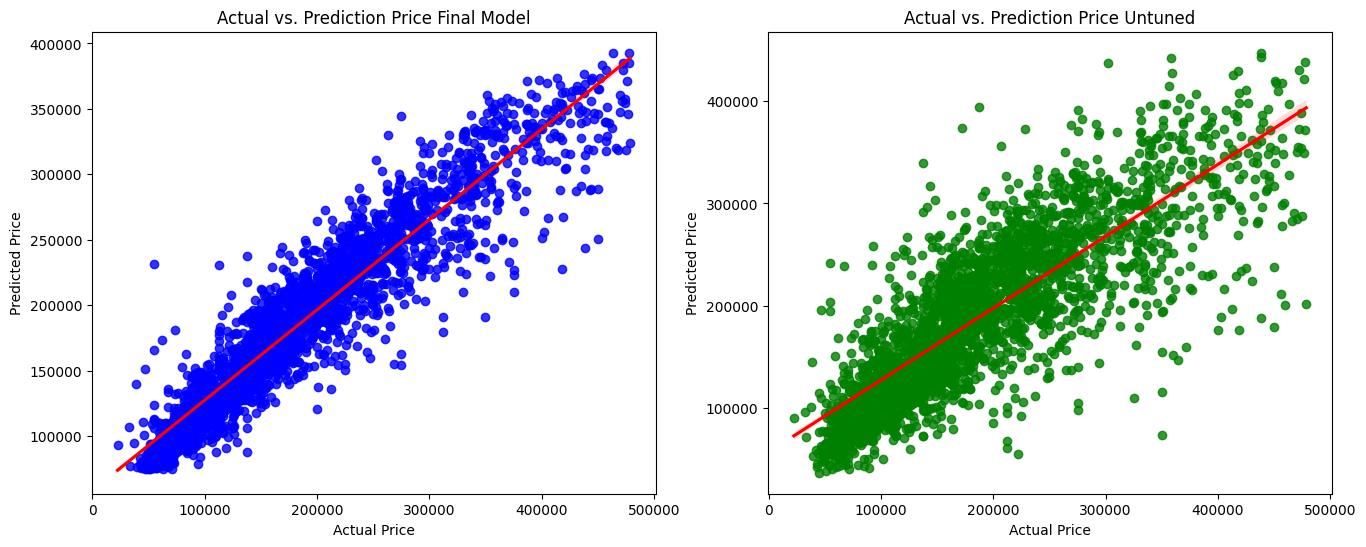

In [121]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred_final,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Actual vs. Prediction Price Final Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_untuned,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Actual vs. Prediction Price Untuned')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

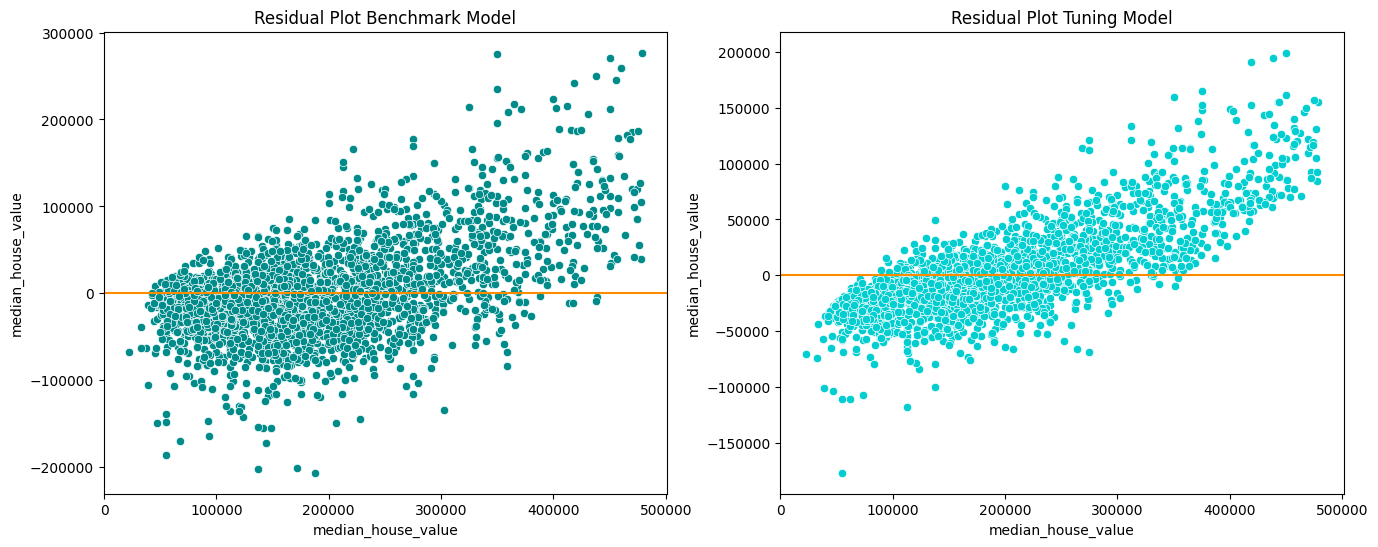

In [120]:
residual_bench = y_test-y_pred_untuned
residual_tuned = y_test-y_pred_final

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_bench,color='darkcyan')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Benchmark Model')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned,color='darkturquoise')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning Model')
plt.show()

In [115]:
import pickle
filename='xgb_california_final.sav'
pickle.dump(xgb_feature,open(filename,'wb'))

# Conclusion

1. `XGBRegressor` menjadi model yang paling cocok pada analisa ini intuk memprediksi median_house_value diantara model-model lainnya
2. Fitur yang paling berpengaruh adalah `ocean_proximity`, terutama ocean_proximity_INLAND dari hasil encoding pipeline. Fitur selain itu yang berpengaruh adalah `median_income` berdasarkan multicol test dan feature importance
3. Setelah tuning dan fitting ke dataset lebih besar (X,y), model berhasil mendapatkan metric yang cukup baik yaitu:
    - RMSE: $37,561
    - MAE: $5,647
    - MAPE: 0.035 (3.5%)
    - R-Squared: 0.842 (84.2%)



# Recommendation

1. Hasil metric menunjukkan ada kemungkinan model overfit pada model tanpa parameter tuning di feature selection, maka dari itu direkomendasikan untuk meningkatkan kompleksitas model dengan feature engineering atau metode lainnya
2. Tuning lebih lanjut dan penambahan fitur yang lebih bisa merepresentasikan dataset juga dianjurkan untuk menghasilkan model yang mempunyai error lebih kecil dan tidak  mengalami overfitting

# Limitation

1. Data California Housing ini diambil pada tahun 1990, sehingga tidak sesuai untuk memprediksi harga rumah sekarang dikarenakan tidak cukup riwayat data yang recent
2. Faktor seperti inflasi dan keningkatan populasi berpengaruh terhadap prediksi model
3. Model terlimitasi terhadap area California 